In [118]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
import collections
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random 

In [119]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.25,stratify=y,random_state=42,)

In [120]:
standard=StandardScaler()
X_train=standard.fit_transform(X_train)
X_test=standard.transform(X_test)

In [121]:
X_train.shape,X_test.shape

((7500, 2), (2500, 2))

In [122]:
print("Number of classes {}".format(np.unique(y_train)))

Number of classes [0 1]


In [123]:
for k,v in collections.Counter(y_train).items():
  print("class {1} has {0} data points".format(v,k))


class 0 has 3740 data points
class 1 has 3760 data points


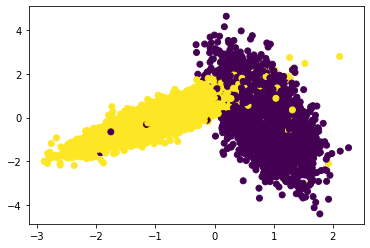

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


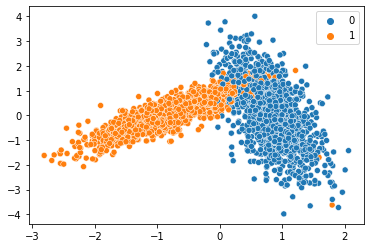

In [125]:
sns.scatterplot(X_test[:,0], X_test[:,1],hue=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [126]:
def params_gen(t):
  A=random.sample(range(t[0],t[1]),10)
  #print(sorted(A))
  return sorted(A)

In [127]:
def RandomSearchCV(X,Y,knn, param_range, folds):
  params=params_gen(param_range)
  CV=[]
  train=[]
  for p in params:
    cv_accuracies=[]
    train_accuracies=[]
    for f in range(0,folds):
      start_idx=round(len(X)/folds)*(f)
      end_idx=round((len(X)/folds)*(f+1))-1
      #-----------------------------------------------------------
      cv_indices=set(np.arange(start_idx,end_idx+1))
      train_indices=list(set(np.arange(0,len(X)))-cv_indices)
      cv_indices=list(cv_indices)
      #-----------------------------------------------------------
      knn.n_neighbors=p
      knn.fit(X[train_indices],Y[train_indices])
      #----------predicting train points----------------------------
      y_train_pred=knn.predict(X[train_indices])
      #------------------predicting test points--------------------
      y_cv_pred=knn.predict(X[cv_indices])
      
      #--------AUC scores-------------------------------------------
      cv_accuracies.append(accuracy_score(Y[cv_indices],y_cv_pred))
      train_accuracies.append(accuracy_score(Y[train_indices],y_train_pred))

    CV.append(np.mean(cv_accuracies))
    train.append(np.mean(train_accuracies))    
  return train,CV,params

In [128]:
cll=KNeighborsClassifier()
folds=3
param_range=(1,30)
train_auc,cv_score,params=RandomSearchCV(X_train,y_train,cll, param_range, folds)

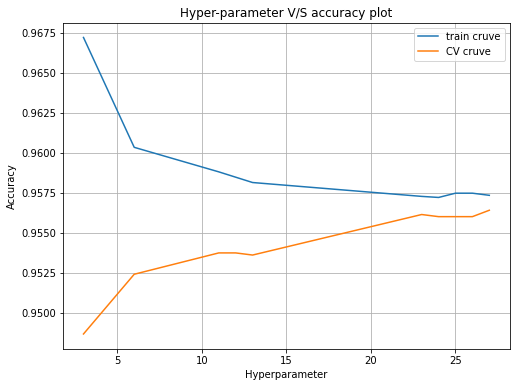

In [129]:
plt.figure(figsize=(8,6))
plt.plot(params,train_auc, label='train cruve')
plt.plot(params,cv_score, label='CV cruve')
plt.title('Hyper-parameter V/S accuracy plot')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
#print(params)

In [130]:
params

[3, 6, 11, 12, 13, 23, 24, 25, 26, 27]

In [137]:
cll.n_neighbors=23
cll.fit(X_train,y_train)
y_pred=cll.predict(X_test)
test_AUC=accuracy_score(y_test,y_pred)
print("Auccuracy on test data "+str(test_AUC*100))

Auccuracy on test data 96.8
